# 감성분석 예제  2: 영화 감상평  예제

### 5개의 Label : 5단계 분석
- 0 : '부정적'
- 1 : '약간 부정적'
- 2 : '중립적'
- 3 : '약간 긍정적'
- 4 : '긍정적'

In [1]:
# Colab : 구글 드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# import os

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

from tqdm import tqdm

In [4]:
from tensorflow.keras.utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Bidirectional

tf.random.set_seed(123)

random.seed(123)

### 데이터 가져오기

In [6]:
train = pd.read_csv('train.tsv',sep='\t')
print(train.shape)  # (156060, 4)
train

(156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


### 텍스트 전처리

In [7]:
def clean_sentences(df):
    reviews = []
    
    for sent in tqdm(df['Phrase']):
        # remove html content
        # review_text = BeautifulSoup(sent).get_text()
        
        review_text = re.sub('[^a-zA-Z]', ' ',sent)  # 영문자이외에는 공백으로 변경
        
        words = word_tokenize(review_text.lower())   # 토큰화
        
        lemma_words = [lemmatizer.lemmatize(i) for i in words]  # 표제어 : 원형
        
        reviews.append(lemma_words)
        
    return reviews

In [8]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IPA(백찬휘)\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IPA(백찬휘)\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# 전처리 코드 실행
train_sentences = clean_sentences(train)
print(len(train_sentences))

100%|████████████████████████████████████████████████████████████████████████| 156060/156060 [00:49<00:00, 3154.75it/s]

156060


In [11]:
# train_sentences[0]

In [14]:
target = train.Sentiment.values
print(target, target.shape)        # (156060,)
y_target = to_categorical(target)  # one-hot 벡터로 변환
print(y_target, y_target.shape)    # Y: (156060, 5)
num_classes = y_target.shape[1]    # 5
print(num_classes)

[1 2 2 ... 3 2 2] (156060,)
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]] (156060, 5)
5


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


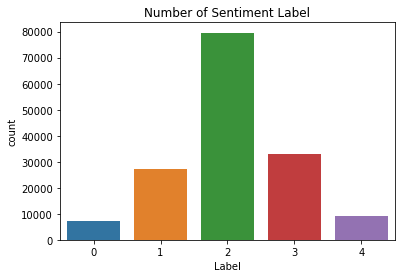

In [15]:
# Y 레이블의 분포
print(train['Sentiment'].value_counts())
sns.countplot(train['Sentiment'])
plt.xlabel('Label')
plt.title('Number of Sentiment Label')
plt.show()

In [18]:
# stratify=y_target: y값의 분포를 원본과 동일한 비율로 split시킴
X_train,X_val,y_train,y_val = train_test_split(train_sentences,y_target,test_size=0.2,stratify=y_target)

In [19]:
X_train

[['anime', 'like', 'this'],
 ['healing'],
 ['crisper', 'and'],
 ['dramatically', 'involving'],
 ['josh'],
 ['sitting', 'through', 'this', 'one'],
 ['stroke', 'the', 'eyeball'],
 ['a', 'sick', 'twisted', 'sort'],
 ['misfire', 'that', 'even', 'tunney', 'ca', 'n', 't', 'save'],
 ['putting',
  'together',
  'familiar',
  'theme',
  'of',
  'family',
  'forgiveness',
  'and',
  'love',
  'in',
  'a',
  'new',
  'way'],
 ['resembles', 'the', 'el', 'cheapo', 'margarita', 'served', 'within'],
 ['recent', 'history'],
 ['devote', 'time'],
 ['the',
  'most',
  'brilliant',
  'and',
  'brutal',
  'uk',
  'crime',
  'film',
  'since',
  'jack',
  'carter'],
 ['the', 'kid'],
 ['projection'],
 ['wa',
  'influenced',
  'by',
  'some',
  'of',
  'the',
  'filmmaker',
  'who',
  'have',
  'directed',
  'him',
  'especially',
  'the',
  'coen',
  'brother',
  'and',
  'steven',
  'soderbergh'],
 ['running',
  'for',
  'office',
  'or',
  'trying',
  'to',
  'win',
  'over',
  'a',
  'probation',
  'offic

In [22]:
# 단어의 길이

unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    
    unique_words.update(sent)  # 집합에 넣어 중복 삭제
    
    if(len_max < len(sent)):
        len_max = len(sent)    # 가장 긴 문장의 길이를 구한다

print(len(list(unique_words))) # 13743 : vocab_size
print(len_max)  # 48 : sequence_length

100%|██████████████████████████████████████████████████████████████████████| 124848/124848 [00:00<00:00, 377054.37it/s]

13743
48


In [23]:
list(unique_words)[-1]  # 마지막 단어

'giggle'

### 토큰화

In [24]:
tokenizer = Tokenizer(num_words=len(list(unique_words))) # 13743
tokenizer.fit_on_texts(list(X_train)) 

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)


X_train = sequence.pad_sequences(X_train,maxlen=len_max) # 48
X_val = sequence.pad_sequences(X_val,maxlen=len_max)

print(X_train.shape, X_val.shape)

(124848, 48) (31212, 48)


In [25]:
X_train[:3]  # 48개 크기로 앞쪽에 0으로 패딩

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 3222,   34,   16],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 6368],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 8380,    4]])

## 학습 모델 구현

In [26]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

In [27]:
model = Sequential([
    Embedding(len(list(unique_words)),300,input_length=len_max),
    LSTM(128,dropout=0.5, recurrent_dropout=0.0,return_sequences=True),
    LSTM(64,dropout=0.5, recurrent_dropout=0.0,return_sequences=False),
    Dense(100,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation='softmax')
    ])

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 300)           4122900   
_________________________________________________________________
lstm (LSTM)                  (None, 48, 128)           219648    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 4,398,961
Trainable params: 4,398,961
Non-trainable params: 0
______________________________________________

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=6, batch_size=256, verbose=1,
                  callbacks=callback)

Train on 124848 samples, validate on 31212 samples
Epoch 1/6
 15360/124848 [==>...........................] - ETA: 8:56 - loss: 1.2472 - accuracy: 0.5115

In [ ]:
accr = model.evaluate(X_val,y_val)

In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))